In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [3]:
# Read the data
df = pd.read_csv('/content/Credit_Default_Prediction_Data_Updated.csv')
df.head()

,LoanID,Customer Type,Loan Type,Loan Amount (USD),Customer Monthly Turn Over (USD),Loan Term (Months),Outstanding Balance,Collateral Types,Collateral Value (USD),County,Drought Probability,Flood Probability,Landslide Probability,Days Past Due Date,Credit Default
0,SYN00000,SME,Agricultural Loan,364511.10,905444.68,36,51240.06,Vehicle,525416.18,Turkana,0.982142,0.093029,0.010000,0,0
1,SYN00001,Corporate,Agricultural Loan,201769.46,101991.26,72,76020.05,Vehicle,346304.95,Garissa,0.875982,0.523716,0.066324,0,1
2,SYN00002,Corporate,Manufacturing,4652.85,5965.12,Revolving,414.16,Building,11996.05,Garissa,0.924866,0.516732,0.069289,0,0
3,SYN00003,Individual,Agricultural Loan,40213.46,97206.48,72,34001.31,Building,108161.83,Kwale,0.210189,0.550838,0.259047,0,0
4,SYN00004,SME,Business Loan,11040.57,31875.85,240,5453.20,Building,21925.70,Turkana,0.984698,0.010000,0.010000,14,0


In [4]:
# df.info()
# df.isna().sum()

In [5]:
# Encode categorical columns
cat_cols = ['Customer Type', 'Loan Type', 'Loan Term (Months)', 'Collateral Types', 'County']

# Use LabelEncoder for simplicity
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head(5)


,LoanID,Customer Type,Loan Type,Loan Amount (USD),Customer Monthly Turn Over (USD),Loan Term (Months),Outstanding Balance,Collateral Types,Collateral Value (USD),County,Drought Probability,Flood Probability,Landslide Probability,Days Past Due Date,Credit Default
0,SYN00000,2,0,364511.10,905444.68,1,51240.06,6,525416.18,9,0.982142,0.093029,0.010000,0,0
1,SYN00001,0,0,201769.46,101991.26,4,76020.05,6,346304.95,1,0.875982,0.523716,0.066324,0,1
2,SYN00002,0,4,4652.85,5965.12,6,414.16,0,11996.05,1,0.924866,0.516732,0.069289,0,0
3,SYN00003,1,0,40213.46,97206.48,4,34001.31,0,108161.83,5,0.210189,0.550838,0.259047,0,0
4,SYN00004,2,1,11040.57,31875.85,0,5453.20,0,21925.70,9,0.984698,0.010000,0.010000,14,0


### Training Model1

In [6]:
# Create dataframe for mModel1
df0 = df.drop(['Drought Probability', 'Flood Probability', 'Landslide Probability'], axis=1)
df0.head()

,LoanID,Customer Type,Loan Type,Loan Amount (USD),Customer Monthly Turn Over (USD),Loan Term (Months),Outstanding Balance,Collateral Types,Collateral Value (USD),County,Days Past Due Date,Credit Default
0,SYN00000,2,0,364511.10,905444.68,1,51240.06,6,525416.18,9,0,0
1,SYN00001,0,0,201769.46,101991.26,4,76020.05,6,346304.95,1,0,1
2,SYN00002,0,4,4652.85,5965.12,6,414.16,0,11996.05,1,0,0
3,SYN00003,1,0,40213.46,97206.48,4,34001.31,0,108161.83,5,0,0
4,SYN00004,2,1,11040.57,31875.85,0,5453.20,0,21925.70,9,14,0


In [7]:
# Define X (features) and y (target)
X = df0.drop(columns=['LoanID', 'Credit Default'])  # Exclude LoanID
y = df0['Credit Default']

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (12000, 10)
Test set: (3000, 10)


In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Train model
Model1 = RandomForestClassifier(n_estimators=100, random_state=42)
Model1.fit(X_train_scaled, y_train)

# from sklearn.ensemble import GradientBoostingClassifier

# # Train model GradientBoostingClassifier
# Model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Model1.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.96      0.79      2014
           1       0.38      0.05      0.09       986

    accuracy                           0.66      3000
   macro avg       0.53      0.51      0.44      3000
weighted avg       0.58      0.66      0.56      3000



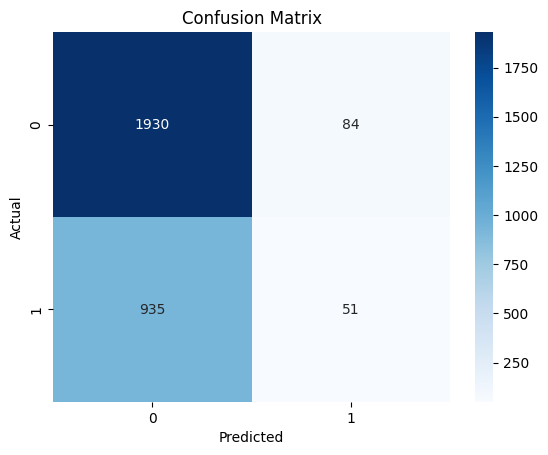

ROC-AUC Score: 0.545290723555799


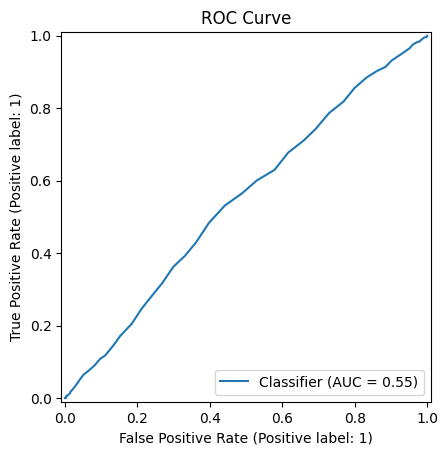

In [13]:
# Predictions and Evaluation
y_pred = Model1.predict(X_test_scaled)
y_proba = Model1.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()

/tmp/ipython-input-14-4096817977.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df0, x='Importance', y='Feature', palette='viridis')


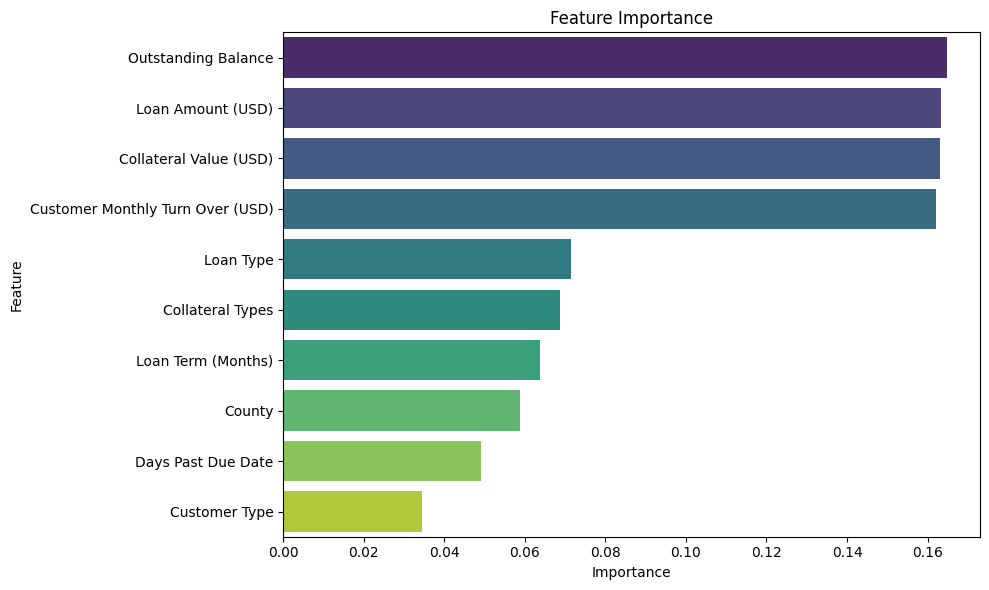

In [14]:
# Feature Importance
importances = Model1.feature_importances_
features = X.columns # Use the columns from X, which was used to train Model2

feat_df0 = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df0.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_df0, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [15]:
# Make predictions on the full dataset
Model1Probabilities = df0.drop(columns=['LoanID', 'Credit Default'])
Model1Probabilities_X_scaled = scaler.transform(Model1Probabilities) # Use the same scaler trained on X_train
y_proba_full = Model1.predict_proba(Model1Probabilities_X_scaled)[:, 1]

# Create the new dataframe with the predicted probabilities
Model1PDs = df0.copy() # Start with a copy of the original dataframe
Model1PDs['ProbabilityDefault'] = y_proba_full
Model1PDs.head()

,LoanID,Customer Type,Loan Type,Loan Amount (USD),Customer Monthly Turn Over (USD),Loan Term (Months),Outstanding Balance,Collateral Types,Collateral Value (USD),County,Days Past Due Date,Credit Default,ProbabilityDefault
0,SYN00000,2,0,364511.10,905444.68,1,51240.06,6,525416.18,9,0,0,0.11
1,SYN00001,0,0,201769.46,101991.26,4,76020.05,6,346304.95,1,0,1,0.86
2,SYN00002,0,4,4652.85,5965.12,6,414.16,0,11996.05,1,0,0,0.36
3,SYN00003,1,0,40213.46,97206.48,4,34001.31,0,108161.83,5,0,0,0.14
4,SYN00004,2,1,11040.57,31875.85,0,5453.20,0,21925.70,9,14,0,0.15


### Training Model2

In [16]:
# df.head()

In [17]:
# Define X (features) and y (target)
X = df.drop(columns=['LoanID', 'Credit Default'])  # Exclude LoanID
y = df['Credit Default']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (12000, 13)
Test set: (3000, 13)


In [19]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# from sklearn.ensemble import GradientBoostingClassifier
# # Train model
# Model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Model2.fit(X_train_scaled, y_train)

# Train model
Model2 = RandomForestClassifier(n_estimators=100, random_state=42)
Model2.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.96      0.79      2014
           1       0.37      0.05      0.09       986

    accuracy                           0.66      3000
   macro avg       0.52      0.50      0.44      3000
weighted avg       0.57      0.66      0.56      3000



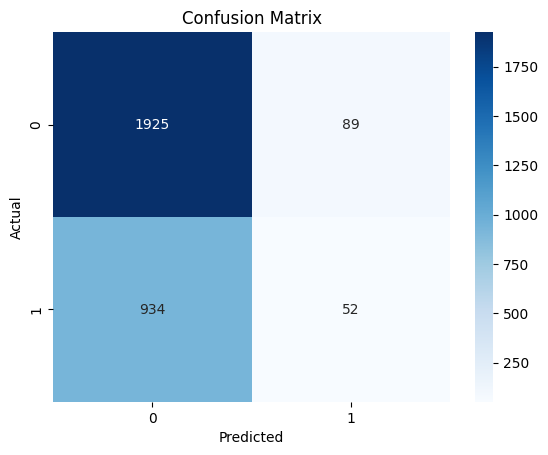

ROC-AUC Score: 0.5459443630892071


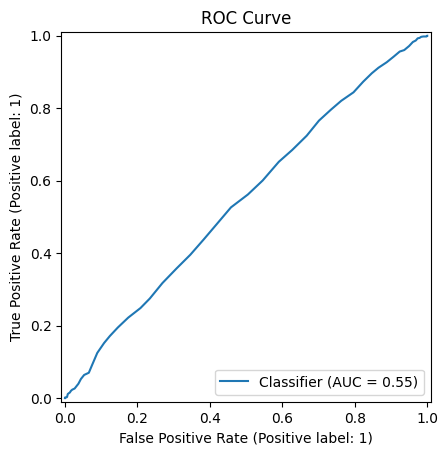

In [26]:
# Predictions and Evaluation
y_pred = Model2.predict(X_test_scaled)
y_proba = Model2.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()


/tmp/ipython-input-27-358541219.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


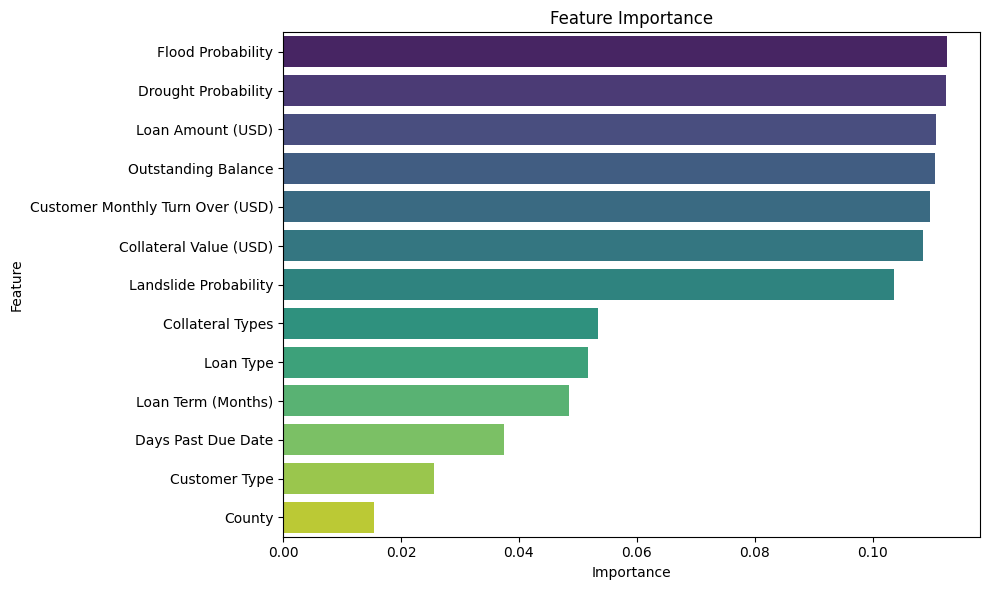

In [27]:
# Feature Importance
importances = Model2.feature_importances_
features = X.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [28]:

# Make predictions on the full dataset
Model2Probabilities = df.drop(columns=['LoanID', 'Credit Default'])
Model2Probabilities_X_scaled = scaler.transform(Model2Probabilities) # Use the same scaler trained on X_train
y_proba_full = Model2.predict_proba(Model2Probabilities_X_scaled)[:, 1]

# Create the new dataframe with the predicted probabilities
Model2PDs = df.copy() # Start with a copy of the original dataframe
Model2PDs['ProbabilityDefaultColum2'] = y_proba_full
Model2PDs.head()

,LoanID,Customer Type,Loan Type,Loan Amount (USD),Customer Monthly Turn Over (USD),Loan Term (Months),Outstanding Balance,Collateral Types,Collateral Value (USD),County,Drought Probability,Flood Probability,Landslide Probability,Days Past Due Date,Credit Default,ProbabilityDefaultColum2
0,SYN00000,2,0,364511.10,905444.68,1,51240.06,6,525416.18,9,0.982142,0.093029,0.010000,0,0,0.12
1,SYN00001,0,0,201769.46,101991.26,4,76020.05,6,346304.95,1,0.875982,0.523716,0.066324,0,1,0.84
2,SYN00002,0,4,4652.85,5965.12,6,414.16,0,11996.05,1,0.924866,0.516732,0.069289,0,0,0.44
3,SYN00003,1,0,40213.46,97206.48,4,34001.31,0,108161.83,5,0.210189,0.550838,0.259047,0,0,0.13
4,SYN00004,2,1,11040.57,31875.85,0,5453.20,0,21925.70,9,0.984698,0.010000,0.010000,14,0,0.14


In [29]:
# Assessing the economic value for my two models
Model1PDs = Model1PDs.rename(columns={'ProbabilityDefault': 'prob_model1'})
Model2PDs = Model2PDs.rename(columns={'ProbabilityDefaultColum2': 'prob_model2'})

# Merge the predicted probabilities back to the original dataframe 'df' or a copy of it
# This ensures we have all necessary original loan data plus the probabilities
df_economic = df.copy()
df_economic['prob_model1'] = Model1PDs['prob_model1']
df_economic['prob_model2'] = Model2PDs['prob_model2']


# Define constants
LGD = 0.8  # Loss Given Default (80%)
ANNUAL_INTEREST_RATE = 0.10

# Define the economic value calculation function (already defined, but included for clarity)
def calculate_expected_value(row, prob_col):
    # Loss if customer defaults
    loss = row["Outstanding Balance"] * LGD
    # Profit if customer repays (simplified interest income over term)
    # Ensure 'Loan Term (Months)' is numeric
    loan_term_years = row["Loan Term (Months)"] / 12 if pd.api.types.is_numeric_dtype(row["Loan Term (Months)"]) else 0
    interest_profit = row["Loan Amount (USD)"] * ANNUAL_INTEREST_RATE * loan_term_years
    # Collateral mitigation
    collateral_recovery = min(row["Collateral Value (USD)"], row["Outstanding Balance"]) if pd.api.types.is_numeric_dtype(row["Collateral Value (USD)"]) and pd.api.types.is_numeric_dtype(row["Outstanding Balance"]) else 0
    # Probability of default
    p_default = row[prob_col] if pd.api.types.is_numeric_dtype(row[prob_col]) else 0
    # Expected value formula
    expected_value = (
        p_default * ( -loss + collateral_recovery ) +
        (1 - p_default) * interest_profit
    )
    return expected_value

# Apply to each model's probabilities using the merged dataframe
df_economic["expected_value_model1"] = df_economic.apply(lambda x: calculate_expected_value(x, "prob_model1"), axis=1)
df_economic["expected_value_model2"] = df_economic.apply(lambda x: calculate_expected_value(x, "prob_model2"), axis=1)

# Summarize total expected value for each model
total_value_model1 = df_economic["expected_value_model1"].sum()
total_value_model2 = df_economic["expected_value_model2"].sum()

improvement = total_value_model2 - total_value_model1

print("Total Expected Economic Value (Model1):", round(total_value_model1, 2))
print("Total Expected Economic Value (Model2):", round(total_value_model2, 2))
print("Improvement from ESG Features:", round(improvement, 2))

Total Expected Economic Value (Model1): 0.0
Total Expected Economic Value (Model2): 0.0
Improvement from ESG Features: 0.0
